# Filtragem em frequência:

__Aluno:__ Lucas Ismael Campos Medeiros

## Leitura da imagem:

Selected input(.pgm):Lena


(<matplotlib.image.AxesImage at 0x21752c9a0c8>,
 Text(0.5, 1.0, 'Imagem original'))

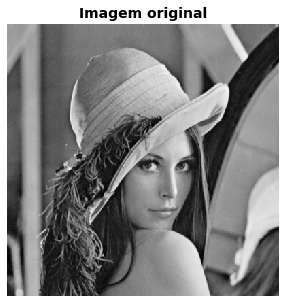

In [11]:
# -*- coding: utf-8 -*-
# DISCIPLINA - PROCESSAMENTO DIGITAL DE IMAGENS
# SEMESTRE - 2020.1
# ALUNO - LUCAS ISMAEL CAMPOS MEDEIROS

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r'C:/Users/Lucas Ismael/Documents/PDI_2020/images/'+input('Selected input(.pgm):')+'.pgm',0)

plt.figure(figsize=(5, 5))
plt.axis("off")
plt.imshow(img, cmap='gray'), plt.title('Imagem original', fontsize=14, fontweight="bold")

## Espectro de magnitude:

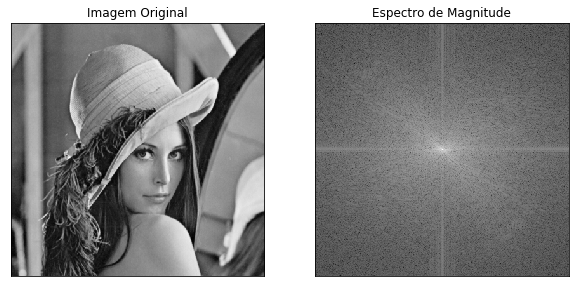

In [13]:
def my_mag_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = 20*np.log(1+np.abs(fshift))
    
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,2)
    plt.imshow(magnitude, cmap = 'gray')
    plt.title('Espectro de Magnitude')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
my_mag_spectrum(img)

## Filtragem em frequência - Ideal:

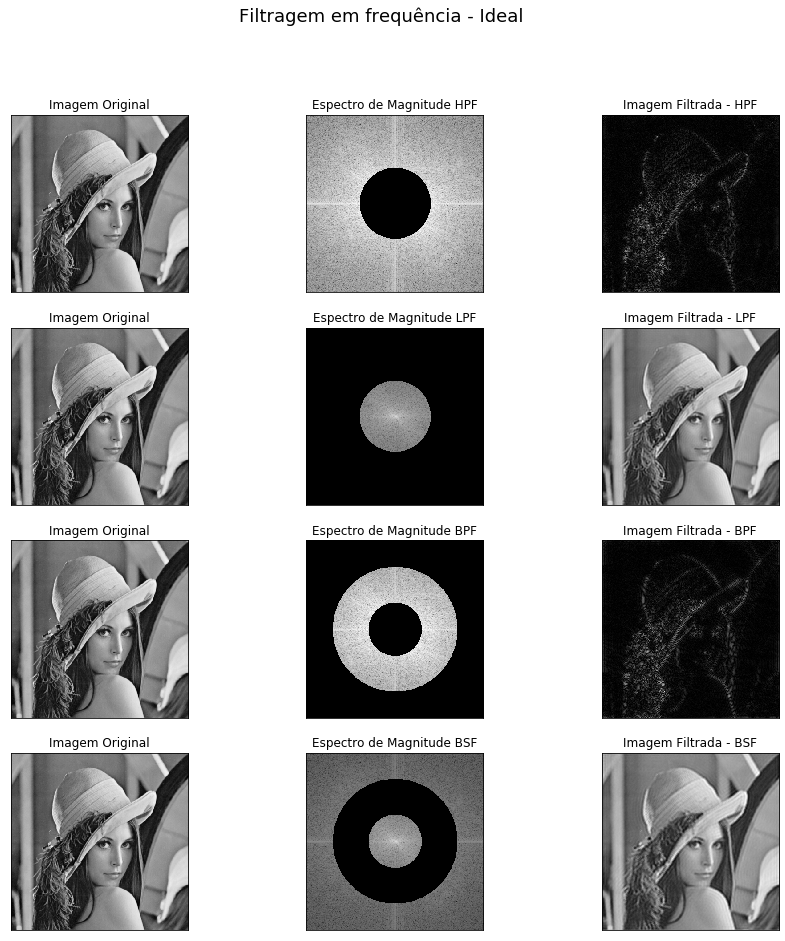

In [15]:
def my_ideal_filtering(img):
    #Calculando a FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, columns = img.shape
    ideal_spectrum = np.ones_like(fshift)
    ideal_BPF = np.zeros_like(fshift)
    ideal_BSF = np.ones_like(fshift)
    
    W= 80 #Largura de Banda
    fc = 100 #Frequência de Corte
    center = [int(rows/2), int(columns/2)]
    x, y = np.ogrid[:rows, :columns]
    
    mask_area1 = (x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2 <= W*W
    mask_area2 = np.logical_and((x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2 >= (fc-W/2)**2,(x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2 <= (fc+W/2)**2)
    ideal_spectrum[mask_area1] = 0
    ideal_BPF[mask_area2] = 1
    ideal_BSF[mask_area2] = 0
    
    fshiftHPF = fshift*ideal_spectrum
    fshiftLPF = fshift*(1-ideal_spectrum)
    fshiftBPF = fshift*ideal_BPF
    fshiftBSF = fshift*ideal_BSF
    magnitude_HPF = 20*np.log(1+np.abs(fshiftHPF))
    magnitude_LPF = 20*np.log(1+np.abs(fshiftLPF))
    magnitude_BPF = 20*np.log(1+np.abs(fshiftBPF))
    magnitude_BSF = 20*np.log(1+np.abs(fshiftBSF))
    
    finverseHPF = np.fft.ifftshift(fshiftHPF)
    img_HPF = np.fft.ifft2(finverseHPF)
    img_HPF = np.abs(img_HPF)
    
    finverseLPF = np.fft.ifftshift(fshiftLPF)
    img_LPF = np.fft.ifft2(finverseLPF)
    img_LPF = np.abs(img_LPF)
    
    finverseBPF = np.fft.ifftshift(fshiftBPF)
    img_BPF = np.fft.ifft2(finverseBPF)
    img_BPF = np.abs(img_BPF)
    
    finverseBSF = np.fft.ifftshift(fshiftBSF)
    img_BSF = np.fft.ifft2(finverseBSF)
    img_BSF = np.abs(img_BSF)
    
    fig = plt.figure(figsize=(15, 15))
    fig.suptitle('Filtragem em frequência - Ideal', fontsize=18)
    plt.subplot(4,3,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,2)
    plt.imshow(magnitude_HPF, cmap = 'gray')
    plt.title('Espectro de Magnitude HPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,3)
    plt.imshow(img_HPF, cmap = 'gray')
    plt.title('Imagem Filtrada - HPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,4)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,5)
    plt.imshow(magnitude_LPF, cmap = 'gray')
    plt.title('Espectro de Magnitude LPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,6)
    plt.imshow(img_LPF, cmap = 'gray')
    plt.title('Imagem Filtrada - LPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,7)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,8)
    plt.imshow(magnitude_BPF, cmap = 'gray')
    plt.title('Espectro de Magnitude BPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,9)
    plt.imshow(img_BPF, cmap = 'gray')
    plt.title('Imagem Filtrada - BPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,10)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,11)
    plt.imshow(magnitude_BSF, cmap = 'gray')
    plt.title('Espectro de Magnitude BSF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,12)
    plt.imshow(img_BSF, cmap = 'gray')
    plt.title('Imagem Filtrada - BSF')
    plt.xticks([])
    plt.yticks([])
    
my_ideal_filtering(img)

## Filtragem em frequência - Butterworth:

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


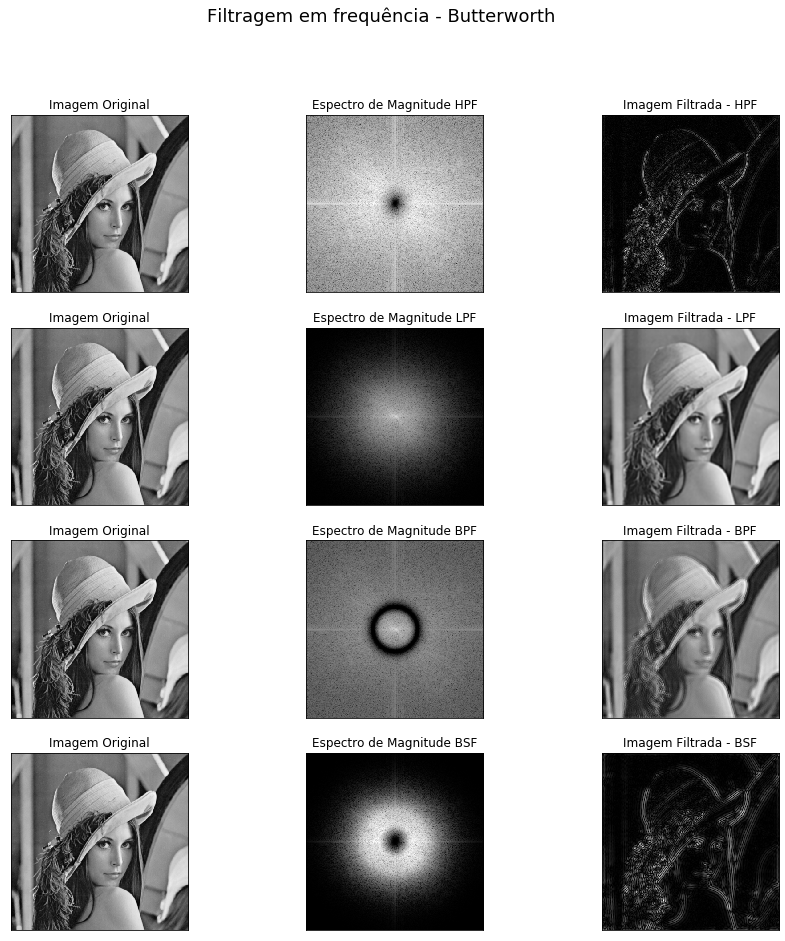

In [20]:
def my_butter_filtering(img):
    #Calculando a FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, columns = img.shape
    
    D0 = 50 #Raio de operação
    W = 40  #Largura de banda
    n = 3   #Ordem do filtro
    center = [int(rows/2), int(columns/2)]
    x, y = np.ogrid[:rows, :columns]
    
    D = np.sqrt((x-np.array(center)[0])**2 + (y-np.array(center)[1])**2)
    HPButterworth = (1+ (np.sqrt(2)-1)*((D0/D)**(2*n)))**-1  
    LPButterworth = (1+ (np.sqrt(2)-1)*((D/D0)**(2*n)))**-1
    BPButterworth = (1+(D*W/(D**2-D0**2))**(2*n))**-1 
    
    fshiftHPF = fshift*HPButterworth
    fshiftLPF = fshift*LPButterworth
    fshiftBPF = fshift*BPButterworth
    fshiftBSF = fshift*(1-BPButterworth)
    magnitude_HPF = 20*np.log(1+np.abs(fshiftHPF))
    magnitude_LPF = 20*np.log(1+np.abs(fshiftLPF))
    magnitude_BPF = 20*np.log(1+np.abs(fshiftBPF))
    magnitude_BSF = 20*np.log(1+np.abs(fshiftBSF))
    
    finverseHPF = np.fft.ifftshift(fshiftHPF)
    img_HPF = np.fft.ifft2(finverseHPF)
    img_HPF = np.abs(img_HPF)
    
    finverseLPF = np.fft.ifftshift(fshiftLPF)
    img_LPF = np.fft.ifft2(finverseLPF)
    img_LPF = np.abs(img_LPF)
        
    finverseBPF = np.fft.ifftshift(fshiftBPF)
    img_BPF = np.fft.ifft2(finverseBPF)
    img_BPF = np.abs(img_BPF)
    
    finverseBSF = np.fft.ifftshift(fshiftBSF)
    img_BSF = np.fft.ifft2(finverseBSF)
    img_BSF = np.abs(img_BSF)
    
    fig = plt.figure(figsize=(15, 15))
    fig.suptitle('Filtragem em frequência - Butterworth', fontsize=18)
    plt.subplot(4,3,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,2)
    plt.imshow(magnitude_HPF, cmap = 'gray')
    plt.title('Espectro de Magnitude HPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,3)
    plt.imshow(img_HPF, cmap = 'gray')
    plt.title('Imagem Filtrada - HPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,4)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,5)
    plt.imshow(magnitude_LPF, cmap = 'gray')
    plt.title('Espectro de Magnitude LPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,6)
    plt.imshow(img_LPF, cmap = 'gray')
    plt.title('Imagem Filtrada - LPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,7)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,8)
    plt.imshow(magnitude_BPF, cmap = 'gray')
    plt.title('Espectro de Magnitude BPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,9)
    plt.imshow(img_BPF, cmap = 'gray')
    plt.title('Imagem Filtrada - BPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,10)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,11)
    plt.imshow(magnitude_BSF, cmap = 'gray')
    plt.title('Espectro de Magnitude BSF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,12)
    plt.imshow(img_BSF, cmap = 'gray')
    plt.title('Imagem Filtrada - BSF')
    plt.xticks([])
    plt.yticks([])
    
my_butter_filtering(img)

## Filtragem em frequência - Gaussian:

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


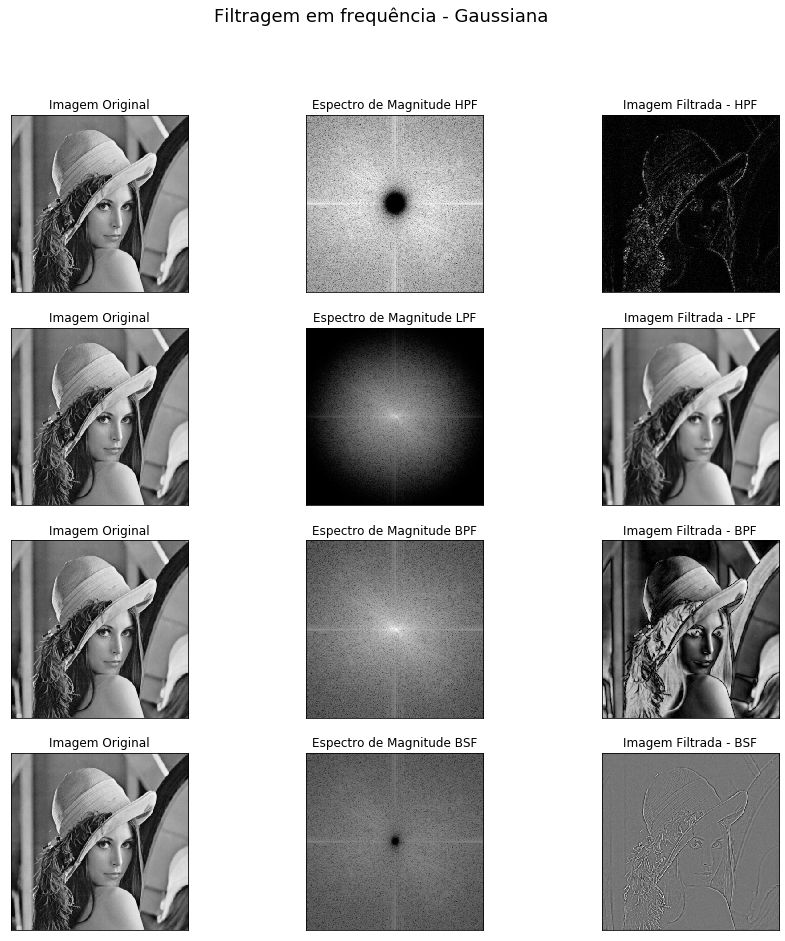

In [17]:
def my_gauss_filtering(img):
    #Calculando a FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    rows, columns = img.shape    
    center = [int(rows/2), int(columns/2)]
    x, y = np.ogrid[:rows, :columns]
    sigma = 70
    D0 = 0.5
    W = 80
    
    D = np.sqrt((x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2)
    HPGauss = np.e**((sigma**2)/(-D**2 ))
    LPGauss = np.e**((-D**2 )/(sigma**2))  
    BPGauss = 1 - np.e**((-(D**2-D0**2)/(D*W))**-1)
    
    fshiftHPF = fshift*HPGauss
    fshiftLPF = fshift*LPGauss
    fshiftBPF = fshift*BPGauss
    fshiftBSF = fshift*(1-BPGauss)
    magnitude_HPF = 20*np.log(1+np.abs(fshiftHPF))
    magnitude_LPF = 20*np.log(1+np.abs(fshiftLPF))
    magnitude_BPF = 20*np.log(1+np.abs(fshiftBPF))
    magnitude_BSF = 20*np.log(1+np.abs(fshiftBSF))
    
    finverseHPF = np.fft.ifftshift(fshiftHPF)
    img_HPF = np.fft.ifft2(finverseHPF)
    img_HPF = np.abs(img_HPF)
    
    finverseLPF = np.fft.ifftshift(fshiftLPF)
    img_LPF = np.fft.ifft2(finverseLPF)
    img_LPF = np.abs(img_LPF)
    
    finverseBPF = np.fft.ifftshift(fshiftBPF)
    img_BPF = np.fft.ifft2(finverseBPF)
    img_BPF = np.abs(img_BPF)
    
    finverseBSF = np.fft.ifftshift(fshiftBSF)
    img_BSF = np.fft.ifft2(finverseBSF)
    img_BSF = np.abs(img_BSF)
    
    fig = plt.figure(figsize=(15, 15))
    fig.suptitle('Filtragem em frequência - Gaussiana', fontsize=18)
    plt.subplot(4,3,1)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,2)
    plt.imshow(magnitude_HPF, cmap = 'gray')
    plt.title('Espectro de Magnitude HPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,3)
    plt.imshow(img_HPF, cmap = 'gray')
    plt.title('Imagem Filtrada - HPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,4)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,5)
    plt.imshow(magnitude_LPF, cmap = 'gray')
    plt.title('Espectro de Magnitude LPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,6)
    plt.imshow(img_LPF, cmap = 'gray')
    plt.title('Imagem Filtrada - LPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,7)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,8)
    plt.imshow(magnitude_BPF, cmap = 'gray')
    plt.title('Espectro de Magnitude BPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,9)
    plt.imshow(img_BPF, cmap = 'gray')
    plt.title('Imagem Filtrada - BPF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,10)
    plt.imshow(img, cmap = 'gray')
    plt.title('Imagem Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,11)
    plt.imshow(magnitude_BSF, cmap = 'gray')
    plt.title('Espectro de Magnitude BSF')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,3,12)
    plt.imshow(img_BSF, cmap = 'gray')
    plt.title('Imagem Filtrada - BSF')
    plt.xticks([])
    plt.yticks([])
    
my_gauss_filtering(img)